Daniel Marten - Project 1 - ECE 566 - Python Notebook & Code

NOTE (and/or warning): the code below was used to make sense of the project
and to create the figures, by no means is it meant to be the focus
or is it particularly presentable
While focus was put into making the report itself presentable and clear, 
this code is unfortunately anything but
Whole sections are repeated for 0-1 and 5-6, instead of being made functions
Also, PLEASE run the code from the top
as some terminology (x_train) is shared between methods
 

In [182]:
# importing
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure

import warnings
warnings.filterwarnings("ignore") # Added this at the end to show a clean output with no warnings but not necessary 


The shape of x is:
(5923, 28, 28)
which means:
Number 0 has 5923 images of size 28x28 and in testing: 
Number 1 has 6742 images of size 28x28 and in testing: 
1 region/s were found also: 1

Area (in pixels):
237
100

Perimeter (in pixels):
93.74011537017762
48.14213562373095

Centroid (pixel coordinates):
(13.978902953586498, 14.080168776371307)
(14.08, 13.95)

Eccentricity:
0.6181813464414365
0.965964935004834

Minor axis length:
18.53176476195907
6.075181761985079



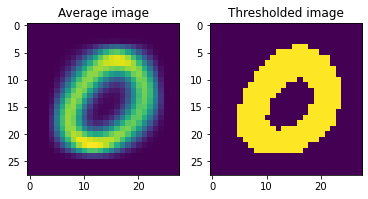

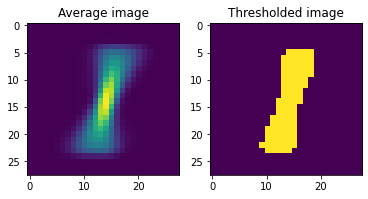

In [183]:
# PROBLEM 1: SEPARATING CLASSES USING FEATURES

# All Setup: 

(x_train, y_train), (x_test, y_test) = mnist.load_data()
number0 = 0
number1 = 1
x0 = x_train[y_train==0,:,:]
x1 = x_train[y_train==1,:,:]
print('The shape of x is:')
print(x0.shape)
print('which means:')
print('Number '+str(number0)+' has '+str(x0.shape[0])+' images of size '+str(x0.shape[1])+'x'+str(x0.shape[2])+' and in testing: ' )
print('Number '+str(number1)+' has '+str(x1.shape[0])+' images of size '+str(x1.shape[1])+'x'+str(x1.shape[2])+' and in testing: ')
# Plotting the average 0 and 1

m = np.mean(x0, axis=0) # IMPORTANT: indexes in python start at "0", not "1", so the first element of array "a" would be a[0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Average image')

mt = 1*(m > 60) # Thresholding
# x0 = mt
plt.subplot(1,2,2)
plt.imshow(mt)
plt.title('Thresholded image')

n = np.mean(x1, axis=0) # IMPORTANT: indexes in python start at "0", not "1", so the first element of array "a" would be a[0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(n)
plt.title('Average image')

nt = 1*(n > 60) # Thresholding
# x1 = nt
plt.subplot(1,2,2)
plt.imshow(nt)
plt.title('Thresholded image')

# Capturing features using skimage measure

mt_props = measure.regionprops(mt)
nt_props = measure.regionprops(nt)
num_regions_m = len(mt_props)
num_regions_n = len(nt_props)

print(str(num_regions_m)+' region/s were found' + ' also: ' + str(num_regions_n))
print('')

print('Area (in pixels):')
area = mt_props[0].area # Remember, index 0 is the first region found
area_n = nt_props[0].area # Remember, index 0 is the first region found
print(area)
print(area_n)
print('')

print('Perimeter (in pixels):')
perimeter = mt_props[0].perimeter
perimeter_n = nt_props[0].perimeter
print(perimeter)
print(perimeter_n)
print('')

print('Centroid (pixel coordinates):')
centroid = mt_props[0].centroid
centroid_n = nt_props[0].centroid
print(centroid)
print(str(centroid_n) + '\n')

print('Eccentricity:')
eccentricity = mt_props[0].eccentricity
eccentricity_n = nt_props[0].eccentricity
print(eccentricity)
print(eccentricity_n)
print('')

print('Minor axis length:')
minor_axis = mt_props[0].minor_axis_length
minor_axis_n = nt_props[0].minor_axis_length
print(minor_axis)
print(minor_axis_n)
print('')

in testing, 0s: 5923 and 1s: 6742
covavg: [[746.05839252 148.65485257]
 [148.65485257  75.78383948]]
swminus: [[ 0.0022004  -0.00431623]
 [-0.00431623  0.02166199]]
v: [[-0.01477226]
 [ 0.67928135]]
slope: [-45.98358637]
Training Data Accuracy Rate: 99.19804153300691


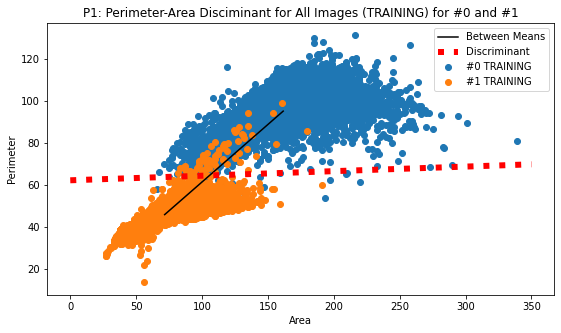

In [184]:
# Separating 0 and 1 JUST based on perimeter

t0 = 1*(x0 > 60) # from x0 and x1 as established above
t1 = 1*(x1 > 60)

print('in testing, 0s: ' + str(t0.shape[0]) + ' and 1s: ' + str(t1.shape[0]))

# Region properties - from code written previously 
area0 = np.zeros(t0.shape[0])
perimeter0 = np.zeros(t0.shape[0])
for i in range(0,t0.shape[0]):
  props = measure.regionprops(t0[i,:,:])
  area0[i] = props[0].area
  perimeter0[i] = props[0].perimeter
  
area1 = np.zeros(t1.shape[0])
perimeter1 = np.zeros(t1.shape[0])
for i in range(0,t1.shape[0]):
  props = measure.regionprops(t1[i,:,:])
  area1[i] = props[0].area
  perimeter1[i] = props[0].perimeter

a0mean = np.mean(area0)
a1mean = np.mean(area1)
p0mean = np.mean(perimeter0)
p1mean = np.mean(perimeter1)

# print(a0mean)

cov0apnp = np.cov(area0,y=perimeter0)
#print(cov0apnp)

cov0 = cov0apnp
cov1 = np.cov(area1,y=perimeter1)

#covWithin = cov0 + cov1
#covBetween = (a0mean - a1mean)*(p0mean - p1mean)
#print(covBetween)
covAvg = (cov0 + cov1)*0.5
print('covavg: ' + str(covAvg)) # ASSUMPTION THAT COVARIANCES EQUAL

swMinus = np.linalg.inv(covAvg)

print('swminus: ' + str(swMinus))

v = np.matmul(swMinus,[[a0mean-a1mean],[p0mean-p1mean]]) # vector
# this and prior work from links: 
# https://sthalles.github.io/fisher-linear-discriminant/ 
# https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture8.pdf 
# v as the FISHER VECTOR
# equals the inverse of the covariance of each class (equal) TIMES 
# the vector of the differences of the means
# if we projected our points onto this, we could develop a HISTOGRAM
# that would show a clear discriminant
# however, I used computation methods based off of
# lines perpindicular to this vector

print('v: ' + str(v))

slope = v[1]/v[0]

print('slope: ' + str(slope))

# MAKE THE DISCRIMINANT PERPINDICULAR TO THIS SLOPE
# if we draw the fisher projection starting at the y-axis, then: 
# y = 

# yint = 4570
# xint = 4570/45

# py1 = 100
# px1 = (100-4570)/(-45)
# px2 = (4570/45)

# sy = [y for y in range(40,80)]
# y = -45x + 4570
# perp: 1/45
perpSlope = -1/slope

# print('p1 mean: ' + str(p1mean))

total = len(area0)*2
# the total number of points
wrongMat = []
# erroneously named, contains data for the rate of how correct the code is
maxRate = 0
minsy = 0;

# sy as y-intercept of discriminant
# previously did sy in range (20,80) , but narrowed it down to this range
for sy in range(600,650):
  # print(sy)
  wrongVal = 0
  sy = sy/10 # go by the tenths, ease computational stress
  for sx in range(0,len(area0)):
    a0val = area0[sx]*perpSlope + sy # decision boundary BY y = perpSlopeX + sy
    a1val = area1[sx]*perpSlope + sy
    b0val = perimeter0[sx] # the actual perimeter values
    b1val = perimeter1[sx]
    if (a0val < b0val):
      wrongVal += 1 # need to count wrong classifications for both 
    if (a1val > b1val):
      wrongVal += 1
      # print(str(aval) + ' , ' + str(bval))
  rate = (1-(1-wrongVal/total)) * 100 # the correctness rate
  if rate > maxRate:
    maxRate = rate # finds the maximum rate of correctness and the best sy for that
    minsy = sy
  wrongMat.append(rate)

# rule is: y=perpSlopex+minsy

print('Training Data Accuracy Rate: ' + str(maxRate))
# print(minsy)
miny0 = minsy 
miny1 = 350*perpSlope + minsy 
# print(miny1)

minx0 = 0
minx1 = 350
  
# we want to PLOT this rule and discriminant from (0,y0) to (350,y1)
# this is arbitrary and just based on what would look appropriate on the graph


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area0,perimeter0, label='#0 TRAINING')
plt.scatter(area1,perimeter1, label='#1 TRAINING')
plt.title('P1: Perimeter-Area Disciminant for All Images (TRAINING) for #0 and #1')
plt.plot([a0mean,a1mean],[p0mean,p1mean],color='black',label='Between Means')
# plt.plot([[px1,px2],[100,0]])
plt.plot([minx0,minx1],[miny0,miny1],color='red',linewidth=6,linestyle=':',label='Discriminant')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()
# plt.legend()

#plt.subplot(1,2,2)
#plt.scatter(area0[0:100],perimeter0[0:100], label='Number 0')
#plt.scatter(area1[0:100],perimeter1[0:100], label='Number 1')
#plt.plot([minx0,minx1],[miny0,miny1])
#plt.title('100 images of each class')
#plt.legend() 

in testing, 0s: 980 and 1s: 1135
Testing Data Accuracy Rate: 99.38775510204081


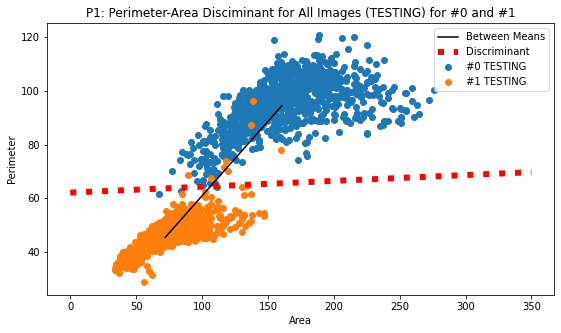

In [185]:
# How does the SAME discriminant work for the TESTING data? 
x0test = x_test[y_test==0,:,:]
x1test = x_test[y_test==1,:,:]

t0t = 1*(x0test > 60) # from x0 and x1 as established above
t1t = 1*(x1test > 60)

print('in testing, 0s: ' + str(t0t.shape[0]) + ' and 1s: ' + str(t1t.shape[0]))


# Region properties - from code written previously 
area0t = np.zeros(t0t.shape[0])
perimeter0t = np.zeros(t0t.shape[0])
for i in range(0,t0t.shape[0]):
  props = measure.regionprops(t0t[i,:,:])
  area0t[i] = props[0].area
  perimeter0t[i] = props[0].perimeter
  
area1t = np.zeros(t1t.shape[0])
perimeter1t = np.zeros(t1t.shape[0])
for i in range(0,t1t.shape[0]):
  props = measure.regionprops(t1t[i,:,:])
  area1t[i] = props[0].area
  perimeter1t[i] = props[0].perimeter

a0tmean = np.mean(area0t)
a1tmean = np.mean(area1t)
p0tmean = np.mean(perimeter0t)
p1tmean = np.mean(perimeter1t)

minsyt = minsy
pslopet = perpSlope

totalt = len(area0t)*2
# the total number of points
wrongMatt = []
wrongVal = 0
# erroneously named, contains data for the rate of how correct the code is
maxRatet = 0

# sy as y-intercept of discriminant
# previously did sy in range (20,80) , but narrowed it down to this range
for sx in range(0,len(area0t)):
  a0val = area0t[sx]*pslopet + minsyt # decision boundary BY y = perpSlopeX + sy
  # print(sx)
  a1val = area1t[sx]*pslopet + minsyt
  b0val = perimeter0t[sx] # the actual perimeter values
  b1val = perimeter1t[sx]
  if (a0val < b0val):
    wrongVal += 1 # need to count wrong classifications for both 
  if (a1val > b1val):
    wrongVal += 1
    # print(str(aval) + ' , ' + str(bval))
rate = (1-(1-wrongVal/totalt)) * 100 # the correctness rate

print('Testing Data Accuracy Rate: ' + str(rate))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area0t,perimeter0t, label='#0 TESTING')
plt.scatter(area1t,perimeter1t, label='#1 TESTING')
plt.title('P1: Perimeter-Area Disciminant for All Images (TESTING) for #0 and #1')
plt.plot([a0tmean,a1tmean],[p0tmean,p1tmean],color='black',label='Between Means')
# plt.plot([[px1,px2],[100,0]])
plt.plot([minx0,minx1],[miny0,miny1],color='red',linewidth=6,linestyle=':',label='Discriminant')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()




The shape of x is:
(892, 28, 28)
which means:
Number 5 has 892 images of size 28x28
Number 6 has 958 images of size 28x28 and in testing: 
covavg: [[988.01709197 321.05275398]
 [321.05275398 186.56115565]]
swminus: [[ 0.00229612 -0.00395138]
 [-0.00395138  0.0121601 ]]
v: [[-0.02841511]
 [ 0.06096171]]
slope: [-2.14539789]
Training Data Accuracy Rate: 63.62107623318386


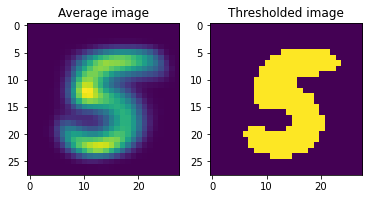

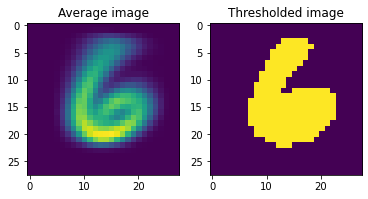

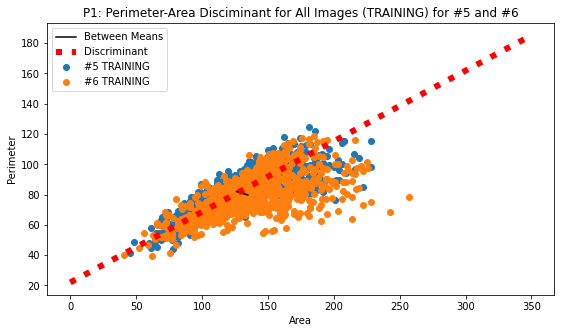

In [186]:
# Separating 5 and 6 JUST based on perimeter

# WARNING: reuses the same code and variable names from above
# except when loading, '5' is in '0's place
# and '6' is in '1's place

x5 = x_test[y_test==5,:,:]
x6 = x_test[y_test==6,:,:]

t0 = 1*(x5 > 60) # from x0 and x1 as established above
t1 = 1*(x6 > 60)

print('The shape of x is:')
print(x5.shape)
print('which means:')
print('Number '+str(5)+' has '+str(x5.shape[0])+' images of size '+str(x5.shape[1])+'x'+str(x5.shape[2]))
print('Number '+str(6)+' has '+str(x6.shape[0])+' images of size '+str(x6.shape[1])+'x'+str(x6.shape[2])+' and in testing: ')
# Plotting the average 0 and 1

m = np.mean(x5, axis=0) # IMPORTANT: indexes in python start at "0", not "1", so the first element of array "a" would be a[0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Average image')

mt = 1*(m > 60) # Thresholding
# x0 = mt
plt.subplot(1,2,2)
plt.imshow(mt)
plt.title('Thresholded image')

n = np.mean(x6, axis=0) # IMPORTANT: indexes in python start at "0", not "1", so the first element of array "a" would be a[0]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(n)
plt.title('Average image')

nt = 1*(n > 60) # Thresholding
# x1 = nt
plt.subplot(1,2,2)
plt.imshow(nt)
plt.title('Thresholded image')

mt_props = measure.regionprops(t0)
nt_props = measure.regionprops(t1)
num_regions_m = len(mt_props)
num_regions_n = len(nt_props)



# Region properties - from code written previously 
area0 = np.zeros(t0.shape[0])
perimeter0 = np.zeros(t0.shape[0])
for i in range(0,t0.shape[0]):
  props = measure.regionprops(t0[i,:,:])
  area0[i] = props[0].area
  perimeter0[i] = props[0].perimeter
  
area1 = np.zeros(t1.shape[0])
perimeter1 = np.zeros(t1.shape[0])
for i in range(0,t1.shape[0]):
  props = measure.regionprops(t1[i,:,:])
  area1[i] = props[0].area
  perimeter1[i] = props[0].perimeter

a0mean = np.mean(area0)
a1mean = np.mean(area1)
p0mean = np.mean(perimeter0)
p1mean = np.mean(perimeter1)

# print(a0mean)

cov0apnp = np.cov(area0,y=perimeter0)
#print(cov0apnp)

cov0 = cov0apnp
cov1 = np.cov(area1,y=perimeter1)

#covWithin = cov0 + cov1
#covBetween = (a0mean - a1mean)*(p0mean - p1mean)
#print(covBetween)
covAvg = (cov0 + cov1)*0.5
print('covavg: ' + str(covAvg)) # ASSUMPTION THAT COVARIANCES EQUAL

swMinus = np.linalg.inv(covAvg)

print('swminus: ' + str(swMinus))

v = np.matmul(swMinus,[[a0mean-a1mean],[p0mean-p1mean]]) # vector
# this and prior work from links: 
# https://sthalles.github.io/fisher-linear-discriminant/ 
# https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture8.pdf 

print('v: ' + str(v))

slope = v[1]/v[0]

print('slope: ' + str(slope))

# MAKE THE DISCRIMINANT PERPINDICULAR TO THIS SLOPE
# if we draw the fisher projection starting at the y-axis, then: 
# y = 

# yint = 4570
# xint = 4570/45

# py1 = 100
# px1 = (100-4570)/(-45)
# px2 = (4570/45)

# sy = [y for y in range(40,80)]
# y = -45x + 4570
# perp: 1/45
perpSlope = -1/slope

# print('p1 mean: ' + str(p1mean))

total = len(area0)*2
# the total number of points
wrongMat = []
# erroneously named, contains data for the rate of how correct the code is
maxRate = 0
minsy = 0;

# sy as y-intercept of discriminant
# previously did sy in range (20,80) , but narrowed it down to this range
for sy in range(-20,80):
  # print(sy)
  wrongVal = 0
  # sy = sy/10 # go by the tenths, ease computational stress
  for sx in range(0,len(area0)):
    a0val = area0[sx]*perpSlope + sy # decision boundary BY y = perpSlopeX + sy
    a1val = area1[sx]*perpSlope + sy
    b0val = perimeter0[sx] # the actual perimeter values
    b1val = perimeter1[sx]
    if (a0val < b0val):
      wrongVal += 1 # need to count wrong classifications for both 
    if (a1val > b1val):
      wrongVal += 1
      # print(str(aval) + ' , ' + str(bval))
  rate = (1-(1-wrongVal/total)) * 100 # the correctness rate
  if rate > maxRate:
    maxRate = rate # finds the maximum rate of correctness and the best sy for that
    minsy = sy
  wrongMat.append(rate)

print('Training Data Accuracy Rate: ' + str(maxRate))
# print(minsy)
miny0 = minsy 
miny1 = 350*perpSlope + minsy 
# print(miny1)

minx0 = 0
minx1 = 350
  
# we want to PLOT this rule and discriminant from (0,y0) to (350,y1)
# this is arbitrary and just based on what would look appropriate on the graph


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area0,perimeter0, label='#5 TRAINING')
plt.scatter(area1,perimeter1, label='#6 TRAINING')
plt.title('P1: Perimeter-Area Disciminant for All Images (TRAINING) for #5 and #6')
plt.plot([a0mean,a1mean],[p0mean,p1mean],color='black',label='Between Means')
# plt.plot([[px1,px2],[100,0]])
plt.plot([minx0,minx1],[miny0,miny1],color='red',linewidth=6,linestyle=':',label='Discriminant')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

#plt.subplot(1,2,2)
#plt.scatter(area0[0:100],perimeter0[0:100], label='Number 0')
#plt.scatter(area1[0:100],perimeter1[0:100], label='Number 1')
#plt.plot([minx0,minx1],[miny0,miny1])
#plt.title('100 images of each class')
#plt.legend() 

# by putting it right throught the middle, you're probably going to get like
# 50% right above and 50% right below
# nice to see it slightly overperform, but NOT a good classifier
# This is more extensively reported on in the report

rate on testing, not training: 63.62107623318386


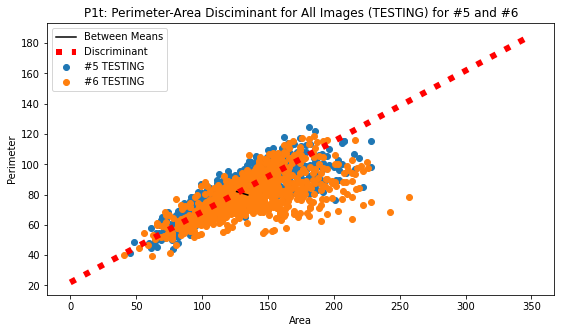

In [187]:
# How does the SAME discriminant work for the TESTING data? 
# for 5 and 6
x0test = x_test[y_test==5,:,:]
x1test = x_test[y_test==6,:,:]

t0t = 1*(x0test > 60) # from x0 and x1 as established above
t1t = 1*(x1test > 60)

# Region properties - from code written previously 
area0t = np.zeros(t0t.shape[0])
perimeter0t = np.zeros(t0t.shape[0])
for i in range(0,t0t.shape[0]):
  props = measure.regionprops(t0t[i,:,:])
  area0t[i] = props[0].area
  perimeter0t[i] = props[0].perimeter
  
area1t = np.zeros(t1t.shape[0])
perimeter1t = np.zeros(t1t.shape[0])
for i in range(0,t1t.shape[0]):
  props = measure.regionprops(t1t[i,:,:])
  area1t[i] = props[0].area
  perimeter1t[i] = props[0].perimeter

a0tmean = np.mean(area0t)
a1tmean = np.mean(area1t)
p0tmean = np.mean(perimeter0t)
p1tmean = np.mean(perimeter1t)

minsyt = minsy
pslopet = perpSlope

totalt = len(area0t)*2
# the total number of points
wrongMatt = []
wrongVal = 0
# erroneously named, contains data for the rate of how correct the code is
maxRatet = 0

# sy as y-intercept of discriminant
# previously did sy in range (20,80) , but narrowed it down to this range
for sx in range(0,len(area0t)):
  a0val = area0t[sx]*pslopet + minsyt # decision boundary BY y = perpSlopeX + sy
  # print(sx)
  a1val = area1t[sx]*pslopet + minsyt
  b0val = perimeter0t[sx] # the actual perimeter values
  b1val = perimeter1t[sx]
  if (a0val < b0val):
    wrongVal += 1 # need to count wrong classifications for both 
  if (a1val > b1val):
    wrongVal += 1
    # print(str(aval) + ' , ' + str(bval))
rate = (1-(1-wrongVal/totalt)) * 100 # the correctness rate

print('rate on testing, not training: ' + str(rate))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area0t,perimeter0t, label='#5 TESTING')
plt.scatter(area1t,perimeter1t, label='#6 TESTING')
plt.title('P1t: Perimeter-Area Disciminant for All Images (TESTING) for #5 and #6')
plt.plot([a0tmean,a1tmean],[p0tmean,p1tmean],color='black',label='Between Means')
# plt.plot([[px1,px2],[100,0]])
plt.plot([minx0,minx1],[miny0,miny1],color='red',linewidth=6,linestyle=':',label='Discriminant')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()


In [188]:
# PROBLEM 2: Developing a Neural Network to do the same

# Everything already imported

# Defining Sigmoid

def sigmoid(z):
    # try: 
      # print("we do a sigmoi!")
    s = 1/(1 + np.exp(-z))
    # except:
    #  print("Houston, wir haben eine Problem!")
    
    return s

In [189]:
# Initializing our weights

def initialize_weights(dim):

    b = 0
    w = np.zeros((dim,1))
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [190]:
# Propogation
# Used to have a VERY extensive amount of print statement and checks for both type and shape, now removed for readability

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """

    m = X.shape[0] # this is the number of examples

    alpha = [] # as the PIECEWISE products of w and x for a given image

    alphaVal = 0 # I forget, do we need to declare variables in Python? 

    for row in range(m):
       alphaVal = float(np.dot(X[row],w)[0]) # arrays DON'T have direction like matrices
       alpha.append(alphaVal)

    zi = []
    yhat = []
    zi = [aa + b for aa in alpha]

    yhat = [sigmoid(bb) for bb in zi]

    loss = []
    dldz = []

    for i in range(m):
      yhatVal = yhat[i]
      if (yhatVal == 1.00):
        yhatVal = 0.9999999
      elif (yhatVal == 0.00):
        yhatVal = 1-0.9999999

      lossVal = -Y[i] * np.log(yhatVal) - (1-Y[i]) * np.log(1-yhatVal)

      loss.append(lossVal) # getting value for loss and appending
      zVal = zi[i]
      dldzVal = -Y[i] * (1/(1+np.exp(zVal))) - (1-Y[i]) * (-np.exp(zVal)/(1+np.exp(-zVal)))
      
      dldz.append(dldzVal)

    jVal = 1/m * sum(loss) # total loss/cost

    grad = np.zeros((m,6)) # matrix for values going forward
    gradBack = np.zeros((m,6)) # matrix for gradient going backwawrds

    # #print('dldz check: ' + str(dldz))
    dldz = np.matrix(dldz)
    db = np.mean(dldz)

    # alpha = np.asarray(alpha)
    alpha = np.matrix(alpha)

    #print('a shape: ' + str(alpha.shape))

    xMat = np.matrix(X)
    at = np.transpose(alpha)
    wt = np.transpose(np.matrix(w))
    xt = np.transpose(np.matrix(xMat))
    dldzt = np.transpose(dldz)

    #print('dw multiplication check: ' + str(xt.shape) + ' ' + str(dldzt.shape))
    dw = np.matmul(xt,dldzt)
    #print('dw check: ' + str(dw.shape)) 
    cost = jVal
    dw = np.asarray(dw)
    w = np.matrix(w)
    #print('asarray w shape: ' + str(w.shape))


    assert(dw.shape == w.shape)
    
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
              "db": db}

    return grads, cost, yhat


In [191]:
# Defining Gradient Descent
# Also used to have some "try" and "except" statements, now commented out\

def gradient_descent(win, bin, Xin, Yin, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost, lastYhat = propagate(win, bin, Xin, Yin)

        dw = grads["dw"]
        db = grads["db"]
        
        win = win - (learning_rate * dw)

        bin += -1 * learning_rate * db

        if (i % 10 == 0):
          print("Cost after iteration %i: %f" % (i,cost))

        if (i % 100 == 0 or i == num_iterations-1):
            costs.append(cost)
            # print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": win,
              "b": bin}
    
    grads = {"dw": dw,
             "db": db}
    # addition of 'lastYhat' return is NEWQ, so as to make prediction easier
    
    return params, grads, costs, lastYhat

In [192]:
# Defining the 'predict' function

def predict(w, b, X):
    '''
    # is this not just the final yHat value we get? 
    # OH, using our outputs from above
    # but without Y
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
        
    A = sigmoid(np.dot(w.T, X.T) + b)
    print(A)
    error = 0
        
    for i in range(A.shape[1]):
      if A[0][i] > 0.95:
        Y_prediction[0][i] = 1
        # WHAT WE WOULD LIKE TO KNOW: is it better to classify an "iffy" 0 as a 1, or the other way? 
        # different costs? 
      elif A[0][i] < 0.1:
        Y_prediction[0][i] = 0
      else:
        # print("Not confident enough! Keep training! value of: " + str(A[0][i]))
        Y_prediction[0][i] = 0 # as default
        error+=1

    psuedoErrorRate = error/m
    perPer = psuedoErrorRate*100
    print("Problems: " + str(error))
    print("Problem rate as a percent: " + str(perPer))
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [193]:
# Loading, Re-Shaping, and Initial Training

# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)


# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

# Initialize parameters with zeros (≈ 1 line of code)
wStart, bStart = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
# learning_rate = 0.005
# num_iterations = 2000
# parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000, 0.005)

# w = 0.5*np.ones(784)

# a = propagate(w,0.5,x_train_flat,y_train)


(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



In [194]:
# Loading, Re-Shaping, and Initial Training
# BUT for 5 and 6

# LOAD DATA
class5 = 5
class6 = 6

(x_train56, y_train56), (x_test56, y_test56) = mnist.load_data()
x_train56 = x_train56[np.isin(y_train56,[class5,class6]),:,:]
y_train56 = 1*(y_train56[np.isin(y_train56,[class5,class6])]>class5)
x_test56 = x_test56[np.isin(y_test56,[class5,class6]),:,:]
y_test56 = 1*(y_test56[np.isin(y_test56,[class5,class6])]>class5)


# RESHAPE

x_train_flat56 = x_train56.reshape(x_train56.shape[0],-1)
print(x_train_flat56.shape)
print('Train: '+str(x_train_flat56.shape[0])+' images and '+str(x_train_flat56.shape[1])+' neurons \n')

x_test_flat56 = x_test56.reshape(x_test56.shape[0],-1)
print(x_test_flat56.shape)
print('Test: '+str(x_test_flat56.shape[0])+' images and '+str(x_test_flat56.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat56 = x_train_flat56 / 255
x_test_flat56 = x_test_flat56 / 255

# Initialize parameters with zeros (≈ 1 line of code)
wStart56, bStart56 = initialize_weights(x_train_flat56.shape[1])

# Gradient descent (≈ 1 line of code)
# learning_rate = 0.005
# num_iterations = 2000
# parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000, 0.005)

# w = 0.5*np.ones(784)

# a = propagate(w,0.5,x_train_flat,y_train)


(11339, 784)
Train: 11339 images and 784 neurons 

(1850, 784)
Test: 1850 images and 784 neurons 



In [103]:
# MOMENT OF TRUTH: TRAINING AND TESTING

# Retrieve parameters w and b from dictionary "parameters"
# These are supposed to be the final w and b after gradient descent on training set
epoch = 2500
stepSize = 0.00001
stepSizeTest = stepSize*3 # IT WORKS
# this is VERY small, because my code is prone to overflow and max value errors
# epoch of 5000 takes 30min to reach ~0.0614 cost

# param5,grad5,costs5,finalyhat5 = gradient_descent(wStart,bStart,x_train_flat,y_train,epoch,stepSize)
# x5s stored and established, as epoch=5000, stepSize = 0.00001

# setting up param10 as epoch=10,000 and stepSize = 0.00004
# 

param25,grad25,costs25,finalyhat25 = gradient_descent(wStart,bStart,x_train_flat,y_train,epoch,stepSizeTest) protected if re-ran :) 



Cost after iteration 0: 0.693147
Cost after iteration 100: 0.017764
Cost after iteration 200: 0.012273
Cost after iteration 300: 0.009892
Cost after iteration 400: 0.008521
Cost after iteration 500: 0.007612
Cost after iteration 600: 0.006958
Cost after iteration 700: 0.006459
Cost after iteration 800: 0.006063
Cost after iteration 900: 0.005739
Cost after iteration 1000: 0.005468
Cost after iteration 1100: 0.005236
Cost after iteration 1200: 0.005036
Cost after iteration 1300: 0.004860
Cost after iteration 1400: 0.004704
Cost after iteration 1500: 0.004564
Cost after iteration 1600: 0.004438
Cost after iteration 1700: 0.004323
Cost after iteration 1800: 0.004218
Cost after iteration 1900: 0.004122
Cost after iteration 2000: 0.004033
Cost after iteration 2100: 0.003950
Cost after iteration 2200: 0.003873
Cost after iteration 2300: 0.003801
Cost after iteration 2400: 0.003734
Cost after iteration 2499: 0.003671


In [158]:
# Same analysis but between 5 and 6

# MOMENT OF TRUTH: TRAINING AND TESTING

# Retrieve parameters w and b from dictionary "parameters"
# These are supposed to be the final w and b after gradient descent on training set
epoch = 5000
stepSize = 0.00001
stepSizeTest = stepSize*3 # IT WORKS
# this is VERY small, because my code is prone to overflow and max value errors
# epoch of 5000 takes 30min to reach ~0.0614 cost

# param5,grad5,costs5,finalyhat5 = gradient_descent(wStart,bStart,x_train_flat,y_train,epoch,stepSize)
# x5s stored and established, as epoch=5000, stepSize = 0.00001

# setting up param10 as epoch=10,000 and stepSize = 0.00004
# 

param25561,grad25561,costs25561,finalyhat25561 = gradient_descent(wStart56,bStart56,x_train_flat56,y_train56,epoch,stepSizeTest) # keep step size and epoch constant

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.134347
Cost after iteration 20: 0.109653
Cost after iteration 30: 0.102649
Cost after iteration 40: 0.099953
Cost after iteration 50: 0.098902
Cost after iteration 60: 0.098477
Cost after iteration 70: 0.098234
Cost after iteration 80: 0.097984
Cost after iteration 90: 0.097662
Cost after iteration 100: 0.097254
Cost after iteration 110: 0.096771
Cost after iteration 120: 0.096230
Cost after iteration 130: 0.095647
Cost after iteration 140: 0.095038
Cost after iteration 150: 0.094413
Cost after iteration 160: 0.093782
Cost after iteration 170: 0.093151
Cost after iteration 180: 0.092524
Cost after iteration 190: 0.091906
Cost after iteration 200: 0.091299
Cost after iteration 210: 0.090703
Cost after iteration 220: 0.090121
Cost after iteration 230: 0.089552
Cost after iteration 240: 0.088997
Cost after iteration 250: 0.088455
Cost after iteration 260: 0.087927
Cost after iteration 270: 0.087413
Cost after iteration 280: 0.086

[[9.98828913e-01 1.51994504e-04 9.99755322e-01 ... 9.99927928e-01
  3.52141160e-04 9.99913352e-01]]
Problems: 9
Problem rate as a percent: 0.425531914893617
[[4.53133252e-04 9.99754619e-01 9.99994377e-01 ... 9.99669153e-01
  1.36672125e-03 9.98182429e-01]]
Problems: 73
Problem rate as a percent: 0.5763916304776944

train accuracy: 99.70785629688118 %
test accuracy: 99.71631205673759 %



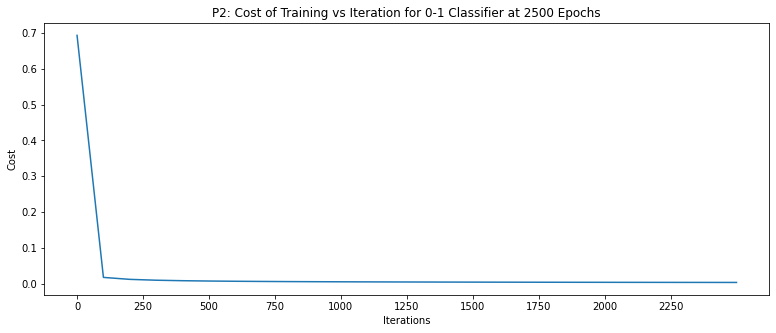

Text(0.5, 1.0, 'Template')

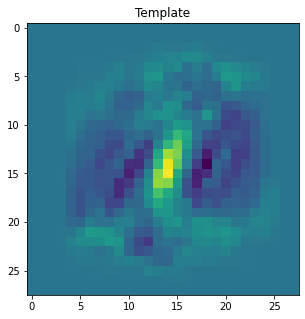

In [195]:
# Continuing after testing, 

w = param25["w"]
# print(w)
b = param25["b"]


    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

# 99.7% ACCURACY FOR BOTH TRAINING AND TESTING DATA LET'S GOOOOOOO

plt.figure(figsize=(13,5))
plt.plot(range(0,2600,100),costs25)
plt.title('P2: Cost of Training vs Iteration for 0-1 Classifier at 2500 Epochs')
# P1t: Perimeter-Area Disciminant for All Images (TESTING) for #5 and #6
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2500,250))
plt.show()


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')


[[9.74274523e-01 9.86385586e-01 9.24443723e-05 ... 9.99981471e-01
  5.00419607e-04 9.99960619e-01]]
Problems: 185
Problem rate as a percent: 10.0
[[3.96813680e-05 2.52667424e-02 9.94990552e-01 ... 6.96579491e-02
  9.48937404e-07 9.93730648e-01]]
Problems: 1321
Problem rate as a percent: 11.650057324279036

train accuracy: 93.72078666549078 %
test accuracy: 93.67567567567568 %



Text(0.5, 1.0, 'Template')

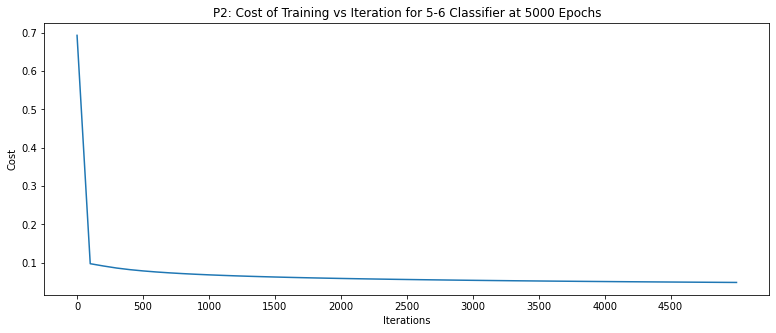

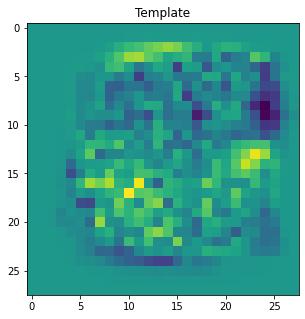

In [196]:
# Continuing after testing, 

w561 = param25561["w"]
# print(w)
b561 = param25561["b"]


    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test561 = predict(w561, b561, x_test_flat56)
y_prediction_train561 = predict(w561, b561, x_train_flat56)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train561 - y_train56)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test561 - y_test56)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,5100,100),costs25561)
plt.title('P2: Cost of Training vs Iteration for 5-6 Classifier at 5000 Epochs')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,5000,500))


plt.figure(figsize=(13,5))
plt.imshow(w561.reshape(28,28))
plt.title('Template')
